# Naive Bayes

Dataset Size: 32561 samples
Number of Features: 14
Class Distribution:
income
0    0.75919
1    0.24081
Name: proportion, dtype: float64



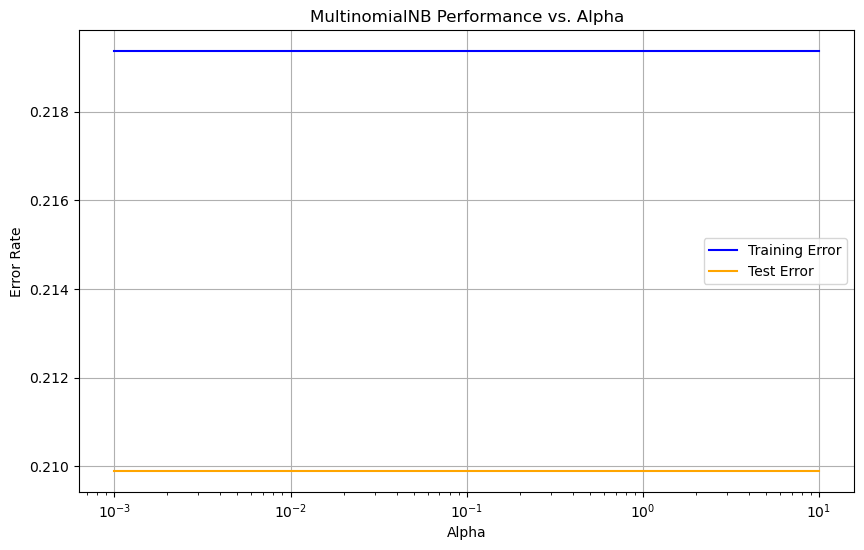

Best alpha: 0.0010

=== Model Performance Summary ===
| Model          | Train Error | Test Error | Test Accuracy |
|----------------|-------------|------------|---------------|
| GaussianNB     | 0.2065      | 0.1962     | 0.8038       |
| MultinomialNB  | 0.2194      | 0.2099     | 0.7901       |
| BernoulliNB    | 0.2660      | 0.2748     | 0.7252       |

=== Final Model Performance Details ===
MultinomialNB with alpha=0.0010
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4985
           1       0.64      0.24      0.35      1528

    accuracy                           0.79      6513
   macro avg       0.72      0.60      0.61      6513
weighted avg       0.77      0.79      0.75      6513



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

seed = 1234
np.random.seed(seed)

# Census data loading and preprocessing
header = ["age", "Job-type", "fnlwgt", "edu", "edu-num", "marital-status", 
          "Job", "Relationship", "race", "sex", "gain", "loss", "hrs/week", 
          "naive", "income"]
df = pd.read_csv("adult/adult.data", low_memory=False, names=header)

# Convert categorical variables to numerical
label_encoders = {}
for column in df.columns:
    if df[column].dtype == "object":
        label_encoders[column] = LabelEncoder()
        
        df[column] = label_encoders[column].fit_transform(df[column])

# Split features and target
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Print dataset analysis
print(f"Dataset Size: {len(df)} samples")
print(f"Number of Features: {X.shape[1]}")
print(f"Class Distribution:\n{df['income'].value_counts(normalize=True)}\n")

# Initialize Naive Bayes models
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

# Train and evaluate Naive Bayes models
results = {}
for name, model in models.items():
    # Train current model
    model.fit(X_train, y_train)
    
    # Make training and test predictions for current model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Calculate training and test error for current model
    train_error = np.mean(y_train != train_preds)
    test_error = np.mean(y_test != test_preds)

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, test_preds)
    
    results[name] = {
        "train_error": train_error,
        "test_error": test_error,
        "test_accuracy": test_accuracy,
        "classification_report": classification_report(y_test, test_preds)
    }

# Alpha parameter tuning for MultinomialNB model
alphas = np.logspace(-3, 1, 10)
train_errors = []
test_errors = []

for alpha in alphas:
    # Initialize and fit MultinomialNB model for current alpha
    mnb = MultinomialNB(alpha=alpha)
    mnb.fit(X_train, y_train)

    # Make training and test predictions for current alpha
    train_preds = mnb.predict(X_train)
    test_preds = mnb.predict(X_test)

    # Calculate and store training and test errors
    train_errors.append(np.mean(y_train != train_preds))
    test_errors.append(np.mean(y_test != test_preds))

# Plot MultinomialNB model parameter tuning results
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_errors, label='Training Error', color='blue')
plt.semilogx(alphas, test_errors, label='Test Error', color='orange')
plt.xlabel('Alpha')
plt.ylabel('Error Rate')
plt.title('MultinomialNB Performance vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()

# Identify best alpha
best_alpha_idx = np.argmin(test_errors)
best_alpha = alphas[best_alpha_idx]
print(f"Best alpha: {best_alpha:.4f}")

# Train final model with optimal parameters
final_model = MultinomialNB(alpha=best_alpha)
final_model.fit(X_train, y_train)
final_test_preds = final_model.predict(X_test)

# Results summary
print("\n=== Model Performance Summary ===")
print("| Model          | Train Error | Test Error | Test Accuracy |")
print("|----------------|-------------|------------|---------------|")
for name, metrics in results.items():
    print(f"| {name:<14} | {metrics['train_error']:.4f}      | {metrics['test_error']:.4f}     | {metrics['test_accuracy']:.4f}       |")

print("\n=== Final Model Performance Details ===")
print(f"MultinomialNB with alpha={best_alpha:.4f}")
print(classification_report(y_test, final_test_preds))